In [134]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import scipy.misc as misc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [139]:
def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

def chi_2(predicted, observed, errors):
    return np.sum(((observed-predicted) / errors) ** 2)

def red_chi_2(predicted, observed, errors, DoF):
    return np.sum(((observed-predicted) / errors) ** 2) / DoF


In [149]:
x = np.array([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
y = np.array([6030, 5439, 4246, 2735, 1281, 291, 16, 573, 1761, 3351, 4703, 5802, 6012])

xerr = 1
yerr = 15

# def malus_test(deg, I_o):
#     return I_o * np.cos(np.radians(deg)) ** 2

def malus_fit(theta_rel, theta_o, I_o, I_bg):
    return I_o * np.cos(np.radians(theta_rel - theta_o)) ** 2 + I_bg


In [150]:
# Does the simple fit
init_params=[0, 0, 0]
lin_opt, lin_cov = opt.curve_fit(malus_fit, x, y, p0=init_params)

# Simple Best fit values
theta_o, I_o, I_bg = lin_opt
dtheta_o, dI_o, dI_bg = np.sqrt(np.diag(lin_cov))

def malus_fitted(theta_rel):
    return I_o * np.cos(np.radians(theta_rel - theta_o)) ** 2 + I_bg


In [151]:
# Uses non-weighted model to estimate how the error in x permutates to error in y

def push_xerr(x, xerr, y, yerr, fitted_model):
    pushed_xerr = xerr * misc.derivative(fitted_model, x)
    add_quad = np.sqrt(yerr ** 2 + pushed_xerr ** 2)
    return add_quad


In [163]:
yerr_adj = push_xerr(x, xerr, y, yerr, malus_fitted)

# Does the fit with adjusted xerr
init_params=[0, 0, 0]
lin_opt, lin_cov = opt.curve_fit(malus_fit, x, y, sigma=yerr_adj, absolute_sigma=True, p0=init_params)

#Weighted Best Fit Values
theta_o, I_o, I_bg = lin_opt
dtheta_o, dI_o, dI_bg = np.sqrt(np.diag(lin_cov))

red_chi_sq = red_chi_2(malus_fitted(x), y, yerr_adj, len(x) - 3)

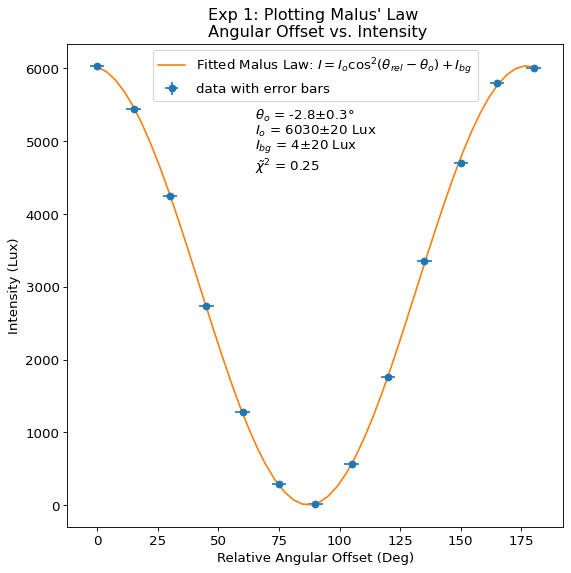

In [167]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(x, y, xerr=3, yerr=10, label="data with error bars", fmt='o')
x_space = np.linspace(x[0],x[-1])
plt.plot(x_space, malus_fit(x_space, theta_o, I_o, I_bg), label=r'Fitted Malus Law: $I=I_o \cos^2(\theta_{rel}-\theta_o)+I_{bg}$', color='tab:orange')

plt.title("Exp 1: Plotting Malus' Law \n Angular Offset vs. Intensity")
plt.xlabel("Relative Angular Offset (Deg)")
plt.ylabel("Intensity (Lux)")

plt.text(65,5300, r'$\theta_o$ = -2.8±0.3°')
plt.text(65,5100, r'$I_o$ = 6030±20 Lux')
plt.text(65,4900, r'$I_{bg}$ = 4±20 Lux')
plt.text(65,4600, r'$\tilde{\chi}^2$ = 0.25')
plt.legend()
plt.show()

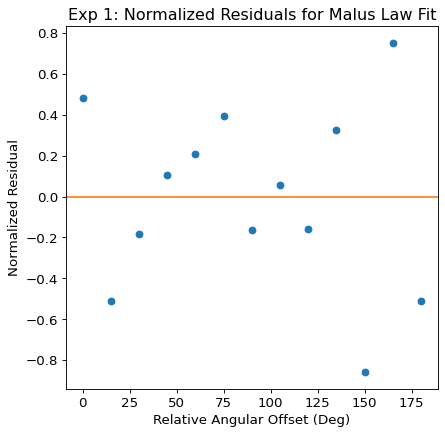

In [154]:
fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(x, norm_res(malus_fitted(x), y, yerr_adj), fmt='o')
plt.axhline(color='tab:orange')

plt.title("Exp 1: Normalized Residuals for Malus Law Fit")
plt.xlabel("Relative Angular Offset (Deg)")
plt.ylabel("Normalized Residual")
plt.show()

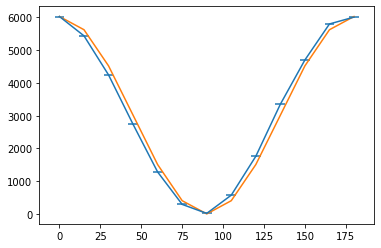

In [7]:
plt.errorbar(x, y, xerr=3, yerr=8)
plt.plot(x, Malus(x, 6030))